In [1]:
%matplotlib notebook

<IPython.core.display.Javascript object>


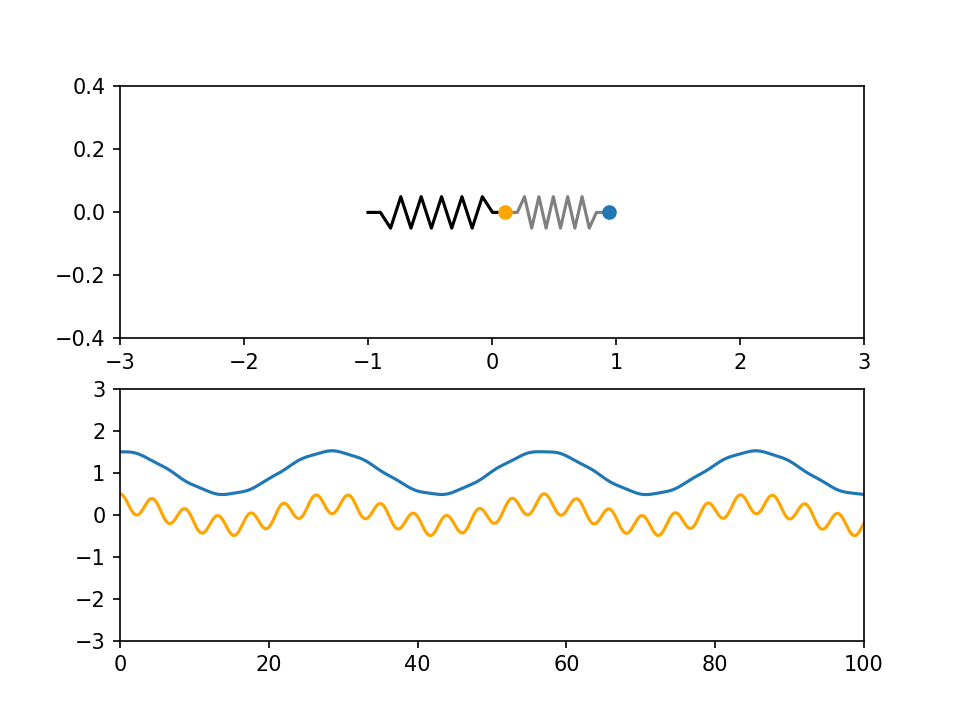

In [2]:
import numpy as np
from numpy import cos,sin
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from sys import exit

# Define constants
k1 = 1
k2 = 1
l01 = 1
l02 = 1
m1 = 1
m2 = 10
v01 = 0
v02 = 0
x01 = 0.5
x02 = x01 + l02

a = 1
b = (k1+k2)/m1 + k2/m2
c = (k1*k2)/(m1*m2)
Delta = b**2 - 4*a*c

# r1 and 2 are actually imaginary, here I took the imaginary part
r1 = np.sqrt((1/2)*(b+np.sqrt(Delta)))
r2 = np.sqrt((1/2)*(b-np.sqrt(Delta)))

c1 = x01*(k1/m1-r2**2)/np.sqrt(Delta)
c2 = 1
c3 = -c1 + x01
c4 = 1

def x1(t):
    #return c1*cos(r1*t) + c2*sin(r1*t) + c3*cos(r2*t) + c4*sin(r2*t)
    return c1*cos(r1*t) + c3*cos(r2*t)

def x2(t):
    #return
    return l02 + (m1/k2)*(-r1**2*c1*cos(r1*t)-r2**2*c3*cos(r2*t)) + (1+k1/k2)*(c1*cos(r1*t)+c3*cos(r2*t))

t = np.linspace(0,100,1000)
x1_array = x1(t)

#plt.plot(t,x1(t))
#plt.plot(t,x2(t))
#plt.show()
#exit()

fig, (ax0,ax1) = plt.subplots(2,1) #initialisation
line3, = ax0.plot([],[],marker='',color='k')
line4, = ax0.plot([],[],marker='',color='grey')
line1, = ax0.plot([],[],marker='o',markersize=6,color='orange')
line2, = ax0.plot([],[],marker='o')

#line5, = ax1.plot(t,x1(t),marker='')
line5, = ax1.plot([],[],marker='',color='orange')
line6, = ax1.plot([],[],marker='',color='tab:blue')

line = [line1,line2,line3,line4,line5,line6]

ax0.set_xlim(-3,3)
ax0.set_ylim(-0.4,0.4)
ax1.set_xlim(0,100)
ax1.set_ylim(-3,3)



def init():
    line1.set_data([], [])
    line2.set_data([], [])
    line3.set_data([], [])
    line4.set_data([], [])
    line5.set_data([], [])
    line6.set_data([], [])
    #line5.set_data(t, x1(t))
    #line6.set_data(t, x2(t))
    return line1,

dt = 0.15 # Time step
t_array = []
x1_array = []
x2_array = []

def animate(i):
    #axs[0].plot([1,2],[3,4])
    t = i*dt
    x1_ = x1(t)
    x2_ = x2(t)
    if t < 100:
        t_array.append(t)
        x1_array.append(x1_)
        x2_array.append(x2_)
        line5.set_data(t_array,x1_array) # x1(t)
        line6.set_data(t_array,x2_array) # x2(t)

    l = 0.1 # length of the little unmovable extremity of the spring
    y = 0
    line1.set_data([x1_],[y]) # First mass
    line2.set_data([x2_],[y]) # Second mass

    # Draw 1st spring
    x = np.linspace(-l01+l,x1_-l,12) 
    h = 0.05
    #dx = x[1]-x[0]
    #lstick = 0.12
    #h = np.sqrt(lstick**2-dx**2) # to have a constant length for the "triangles"...but doesn't look that better
    x = np.append(x,[x1_]) # Add a fixed length horizontal line representing the extremity of the spring
    x = np.append([-l01],x) # Add a fixed length horizontal line representing the extremity of the spring
    y = np.array([0,0,-h,h,-h,h,-h,h,-h,h,-h,h,0,0])
    #y = np.array([0,0,-h,h,-h,h,-h,h,-h,h,-h,h,-h,h,-h,h,-h,h,0,0])
    line3.set_data(x,y)

    # Draw 2nd spring
    x = np.linspace(x1_+l,x2_-l,12)
    x = np.append([x1_],x)
    x = np.append(x,[x2_])
    h = 0.05
    y = np.array([0,0,h,-h,h,-h,h,-h,h,-h,h,-h,0,0])
    line4.set_data(x,y)
    return line1,line2,line3,line4,line5,line6,

ani = animation.FuncAnimation(fig,animate,init_func=init, frames=1000,blit=True,interval=10,repeat=False)

#x = x1(dt)
#y = 0
#print(x,y)
#plt.plot([x],[y],marker='o')

#x = np.linspace(-l01,x01,12)
#h = 0.05
#y = np.array([0,-h,h,-h,h,-h,h,-h,h,-h,h,0])
#plt.plot(x,y)

from IPython import display
    
# saving to m4 using ffmpeg writer
#writervideo = animation.FFMpegWriter(fps=60)
#ani.save('spring.mp4', writer=writervideo)
#plt.close()

plt.show()